In [8]:
import pandas as pd

file_path_power_data = '全国年度总发电量以及各种发电方式的占比.xlsx'

power_data_analysis = pd.read_excel(file_path_power_data)

power_data_analysis.head()


,年份,总发电量,水力发电量,占比,火力发电量,占比.1,核电,占比.2,光电,占比.3,清洁能源发电量,清洁能源占比
0,2005,24973.0,3970,0.158794,20473,0.818887,530.0,0.021199,0,0.0,4500.0,0.180195
1,2006,28601.0,4357,0.152040,23696,0.826883,548.0,0.019123,0,0.0,4905.0,0.171498
2,2007,32702.0,4852,0.147859,27229,0.829773,621.0,0.018924,0,0.0,5473.0,0.167360
3,2008,33606.0,5851,0.168772,27072,0.780893,683.0,0.019701,0,0.0,6534.0,0.194430
4,2009,36684.0,6156,0.165724,29827,0.802967,701.0,0.018871,0,0.0,6857.0,0.186921


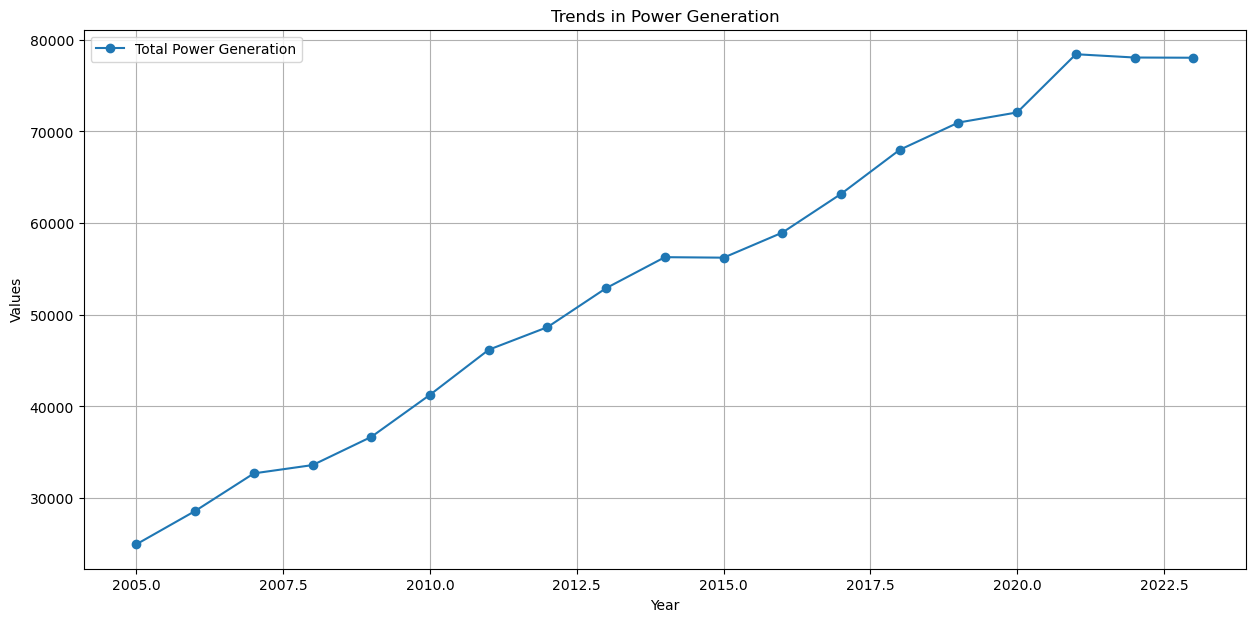

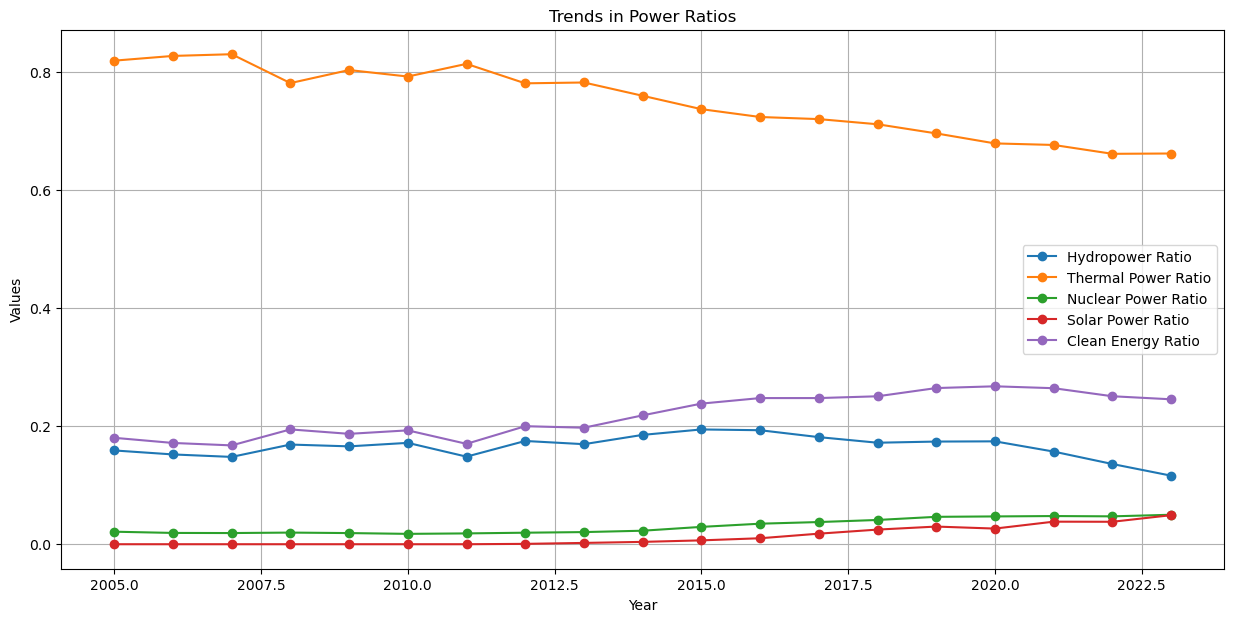

In [9]:
import matplotlib.pyplot as plt

# 预处理数据
# 重命名列，使其更具可读性
columns_rename = {
    '年份': 'Year',
    '总发电量': 'Total_Power_Generation',
    '水力发电量': 'Hydropower',
    '占比': 'Hydropower_Ratio',
    '火力发电量': 'Thermal_Power',
    '占比.1': 'Thermal_Power_Ratio',
    '核电': 'Nuclear_Power',
    '占比.2': 'Nuclear_Power_Ratio',
    '光电': 'Solar_Power',
    '占比.3': 'Solar_Power_Ratio',
    '清洁能源发电量': 'Clean_Energy_Power',
    '清洁能源占比': 'Clean_Energy_Ratio'
}
power_data_renamed = power_data_analysis.rename(columns=columns_rename)

# 设置年份为索引
power_data_renamed.set_index('Year', inplace=True)

# 趋势分析
plt.figure(figsize=(15, 7))

# 总发电量趋势
plt.plot(power_data_renamed['Total_Power_Generation'], label='Total Power Generation', marker='o')

plt.title('Trends in Power Generation')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# 各种发电方式的占比趋势
plt.figure(figsize=(15, 7))
plt.plot(power_data_renamed['Hydropower_Ratio'], label='Hydropower Ratio', marker='o')
plt.plot(power_data_renamed['Thermal_Power_Ratio'], label='Thermal Power Ratio', marker='o')
plt.plot(power_data_renamed['Nuclear_Power_Ratio'], label='Nuclear Power Ratio', marker='o')
plt.plot(power_data_renamed['Solar_Power_Ratio'], label='Solar Power Ratio', marker='o')
plt.plot(power_data_renamed['Clean_Energy_Ratio'], label='Clean Energy Ratio', marker='o')

plt.title('Trends in Power Ratios')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# 选择总发电量进行时间序列预测
# 设置年份为索引
power_data_for_prediction = power_data_analysis.set_index('年份')['总发电量']

# 使用ARIMA模型进行预测
# 定义ARIMA模型的参数
arima_order = (5, 1, 1)

# 定义和拟合模型
arima_model = ARIMA(power_data_for_prediction, order=arima_order)
arima_model_fit = arima_model.fit()

# 预测2024年到2060年的总发电量
forecast_years = list(range(2024, 2061))  # 从2024年到2060年
arima_forecast = arima_model_fit.forecast(steps=len(forecast_years))

# 创建预测结果的DataFrame
arima_forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Predicted_Total_Power_Generation': arima_forecast
})

arima_forecast_df.head()  # 展示前几行预测结果


c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa

,Year,Predicted_Total_Power_Generation
19,2024,79840.464091
20,2025,82045.037373
21,2026,84359.012366
22,2027,86173.911297
23,2028,87724.586716


In [11]:
# Correcting the code to properly unpack the forecast results and confidence intervals

# Re-running the ARIMA model forecast
arima_forecast_result = arima_model_fit.get_forecast(steps=len(forecast_years))

# Extracting the forecast and confidence intervals
arima_forecast = arima_forecast_result.predicted_mean
forecast_conf_int = arima_forecast_result.conf_int(alpha=0.05)  # 95% confidence interval

# Creating the DataFrame with the forecast and confidence intervals
arima_forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Predicted_Total_Power_Generation': arima_forecast,
    'Lower_Confidence_Interval': forecast_conf_int.iloc[:, 0],
    'Upper_Confidence_Interval': forecast_conf_int.iloc[:, 1]
})

# Displaying the first few rows of the forecast DataFrame
arima_forecast_df.head()


c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Year,Predicted_Total_Power_Generation,Lower_Confidence_Interval,Upper_Confidence_Interval
19,2024,79840.464091,75747.882624,83933.045558
20,2025,82045.037373,76100.720117,87989.354629
21,2026,84359.012366,76859.436663,91858.588069
22,2027,86173.911297,77453.010463,94894.812130
23,2028,87724.586716,77815.402173,97633.771260


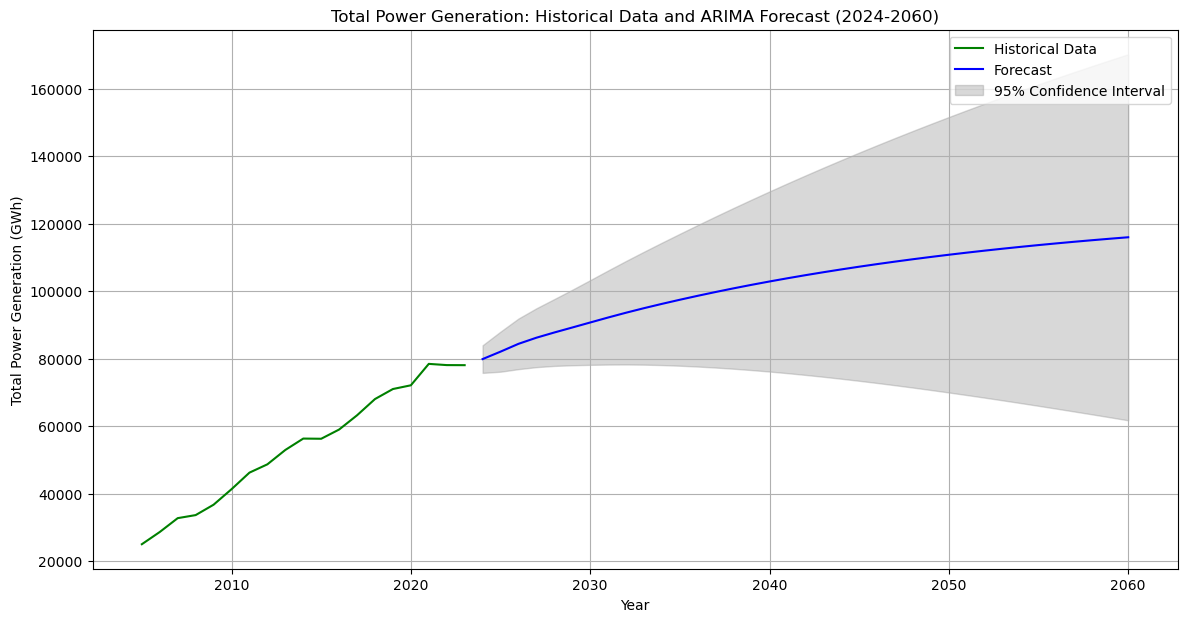

In [12]:
# 拼接原有数据和预测数据
# 首先转换原数据的'年份'列为Year，以便与预测数据对齐
power_data_analysis_renamed = power_data_analysis.rename(columns={'年份': 'Year', '总发电量': 'Total_Power_Generation'})

# 过滤出需要的列
power_data_analysis_filtered = power_data_analysis_renamed[['Year', 'Total_Power_Generation']]

# 拼接历史数据和预测数据
combined_data = pd.concat([power_data_analysis_filtered, arima_forecast_df.drop(columns=['Lower_Confidence_Interval', 'Upper_Confidence_Interval'])])

# 重新绘制图像，包括历史数据和预测数据
plt.figure(figsize=(14, 7))
# 历史数据
plt.plot(power_data_analysis_filtered['Year'], power_data_analysis_filtered['Total_Power_Generation'], color='green', label='Historical Data')
# 预测数据
plt.plot(arima_forecast_df['Year'], arima_forecast_df['Predicted_Total_Power_Generation'], color='blue', label='Forecast')
# 置信区间
plt.fill_between(arima_forecast_df['Year'], 
                 arima_forecast_df['Lower_Confidence_Interval'], 
                 arima_forecast_df['Upper_Confidence_Interval'], 
                 color='gray', alpha=0.3, label='95% Confidence Interval')

# 标题和标签
plt.title('Total Power Generation: Historical Data and ARIMA Forecast (2024-2060)')
plt.xlabel('Year')
plt.ylabel('Total Power Generation (GWh)')
plt.legend()

# 显示网格
plt.grid(True)

# 显示图像
plt.show()


In [20]:

# 选择总发电量进行时间序列预测
# 设置年份为索引
power_data_for_prediction = power_data_analysis.set_index('年份')['清洁能源占比']

# 使用ARIMA模型进行预测
# 定义ARIMA模型的参数
arima_order = (1, 1, 1)

# 定义和拟合模型
arima_model = ARIMA(power_data_for_prediction, order=arima_order)
arima_model_fit = arima_model.fit()

# 预测2024年到2060年的总发电量
forecast_years = list(range(2024, 2061))  # 从2024年到2060年
arima_forecast = arima_model_fit.forecast(steps=len(forecast_years))

# 创建预测结果的DataFrame
arima_forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Predicted_Total_Power_Generation': arima_forecast
})

arima_forecast_df.head()  # 展示前几行预测结果


c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa

,Year,Predicted_Total_Power_Generation
19,2024,0.244955
20,2025,0.245322
21,2026,0.245025
22,2027,0.245265
23,2028,0.245070


c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


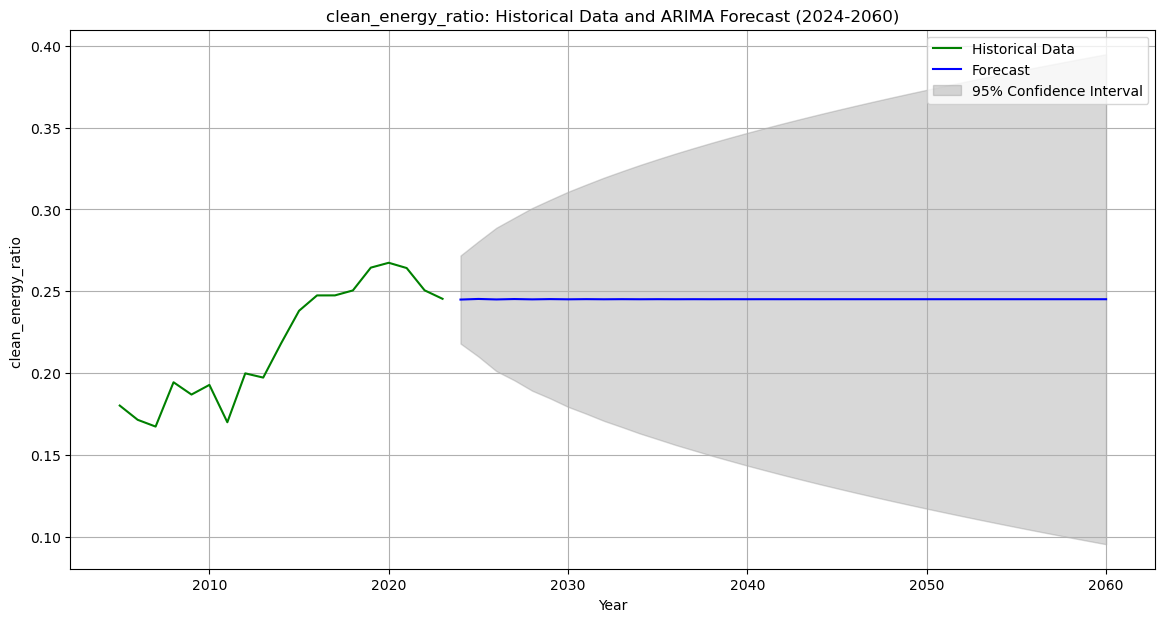

In [21]:
# Correcting the code to properly unpack the forecast results and confidence intervals

# Re-running the ARIMA model forecast
arima_forecast_result = arima_model_fit.get_forecast(steps=len(forecast_years))

# Extracting the forecast and confidence intervals
arima_forecast = arima_forecast_result.predicted_mean
forecast_conf_int = arima_forecast_result.conf_int(alpha=0.05)  # 95% confidence interval

# Creating the DataFrame with the forecast and confidence intervals
arima_forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Predicted_clean_energy_ratio': arima_forecast,
    'Lower_Confidence_Interval': forecast_conf_int.iloc[:, 0],
    'Upper_Confidence_Interval': forecast_conf_int.iloc[:, 1]
})

# Displaying the first few rows of the forecast DataFrame
arima_forecast_df.head()

# 拼接原有数据和预测数据
# 首先转换原数据的'年份'列为Year，以便与预测数据对齐
power_data_analysis_renamed = power_data_analysis.rename(columns={'年份': 'Year', 
                                                                  '清洁能源占比': 'clean_energy_ratio'})

# 过滤出需要的列
power_data_analysis_filtered = power_data_analysis_renamed[['Year', 'clean_energy_ratio']]

# 拼接历史数据和预测数据
combined_data = pd.concat([power_data_analysis_filtered, arima_forecast_df.drop(columns=['Lower_Confidence_Interval',
                                                                                         'Upper_Confidence_Interval'])])

# 重新绘制图像，包括历史数据和预测数据
plt.figure(figsize=(14, 7))
# 历史数据
plt.plot(power_data_analysis_filtered['Year'], power_data_analysis_filtered['clean_energy_ratio'], color='green', label='Historical Data')
# 预测数据
plt.plot(arima_forecast_df['Year'], arima_forecast_df['Predicted_clean_energy_ratio'], color='blue', label='Forecast')
# 置信区间
plt.fill_between(arima_forecast_df['Year'], 
                 arima_forecast_df['Lower_Confidence_Interval'], 
                 arima_forecast_df['Upper_Confidence_Interval'], 
                 color='gray', alpha=0.3, label='95% Confidence Interval')

# 标题和标签
plt.title('clean_energy_ratio: Historical Data and ARIMA Forecast (2024-2060)')
plt.xlabel('Year')
plt.ylabel('clean_energy_ratio ')
plt.legend()

# 显示网格
plt.grid(True)

# 显示图像
plt.show()